# Qiskit Examples

In this section we will see some examples of qiskit implementation of the concepts introduces in lesson 1. (See Notes for more details)

## Vector and Matrices in Pythin

Qiskit make use of the Python languagem and in python, matrix and vector computations can be performed using the `array` class from the `NumPy` library.


Here is an example of the code that defines two vectors `ket0` and `ket1`, corresponding to the qubit state vectors $|0\rangle$ and $|1\rangle$ and displays an average

In [1]:
from numpy import array

ket0 = array([1, 0])
ket1 = array([0, 1])

display(ket0/2 + ket1/2)

array([0.5, 0.5])

You may not need to use the explicit `display` command

In [2]:
ket0/2 + ket1/2

array([0.5, 0.5])

We can also make use of `array` to create matrices that represent operations

In [3]:
M1 = array([[1, 1], [0, 0]])
M2 = array([[1, 1], [1, 0]])

M1/2 + M2/2

array([[1. , 1. ],
       [0.5, 0. ]])

Matrix multiplication can be performed using the  `matmul`

In [4]:
from numpy import matmul

display(matmul(M1, ket0/2 + ket1/2))
display(matmul(M2, ket0/2 + ket1/2))
display(matmul(M1/2 + M2/2, ket0 + ket1))
display(matmul(M1,M2))
display(matmul(M2,M1))

array([1., 0.])

array([1. , 0.5])

array([2. , 0.5])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

## State, Measurements and Operations

Qiskit `statevector` class provides functionality for defining and manipulating quantum state vectors. The following code cell imports the `Statevector` class and defines a few vectors using it

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
Statevector([ 0.33333333+0.66666667j, -0.66666667+0.j        ],
            dims=(2,))
Statevector([0.33333333+0.j, 0.66666667+0.j],
            dims=(2,))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

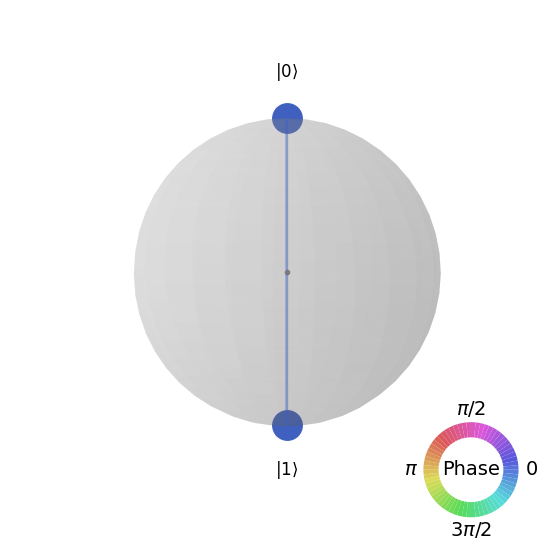

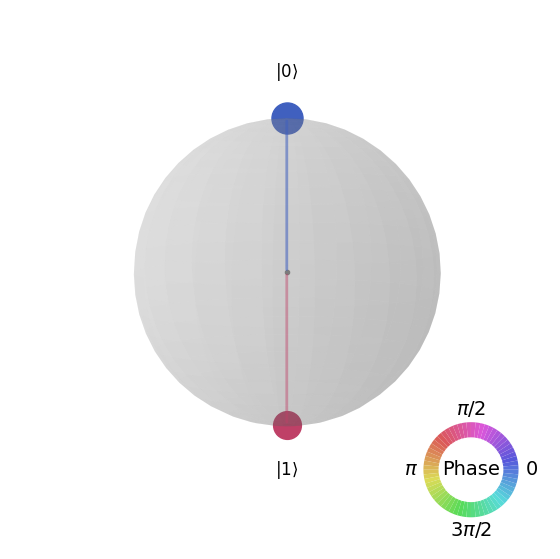

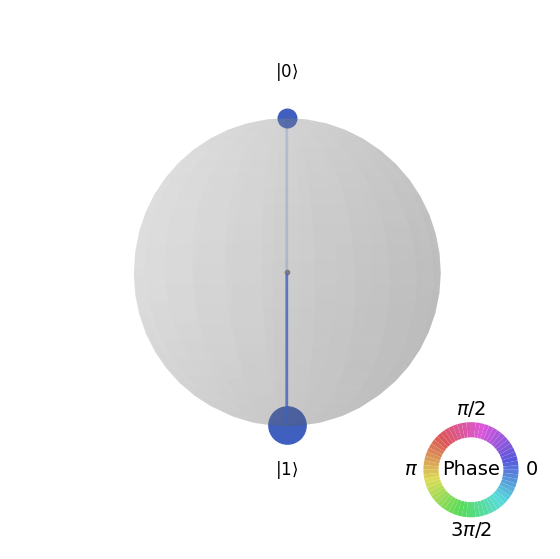

In [5]:
from qiskit.quantum_info import Statevector
from numpy import sqrt
import matplotlib

u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])


# display them
display(u)
display(v)
display(w)
# using latex
display(u.draw('latex'))
display(v.draw('latex'))
display(w.draw('latex'))
# using matplotlib
display(u.draw('qsphere'))
display(v.draw('qsphere'))
display(w.draw('qsphere'))


The statevector also includes the `is_valid` method which check if the quantum state is valid or not

In [6]:
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

### Simulating Measurements using `Statevector`

We will see one of the way that measurements of quantum states can be simulated in Qiskit using the `measure` method from the `Statevector` class

First, we create a qubit state vector `v` and then display it

In [7]:
v = Statevector([(1+2.0j)/3, -2/3])
v.draw("latex")

<IPython.core.display.Latex object>

Next, running the `measure` method simulates a standard basis measurement, It returns the result of that measurement, plus the new quantum state of our system after that measurement.

In [8]:
v.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

Measurement outcomes are probabilistic, so the same method can return different results. You can see that for yourself, by running the above code multiple times.

`Statevector` also comes with a `sample_counts` method that allows for the simulation of any number of measurements on the system, 

{'0': 551, '1': 449}

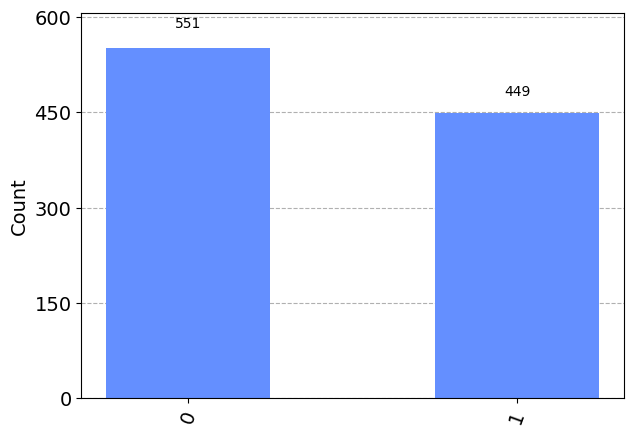

In [9]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(shots=1000)
display(statistics)
plot_histogram(statistics)

### Performing operations with `Operator` and `Statevector`

Unitary operations can be defined and performed in state vectors in Qiskit using the `Operator` class, as in the example below:

In [10]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

display(v.draw("text"))
display(v.draw("latex"))

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

<IPython.core.display.Latex object>

### Looking ahead toward quantum circuits

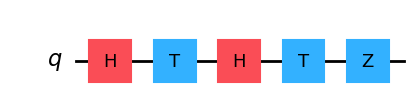

In [11]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw('mpl')

The operations are applied sequentually, starting on the left and ending on the right in the figure.

Let us first initialize a starting quantum state vector and then evolve that state according to the sequence of operations

In [12]:
ket0 = Statevector([1, 0])  
v = ket0.evolve(circuit)
display(v.draw('text'))

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

Finally, let's simulate the result of running this experiemnt 4000 times

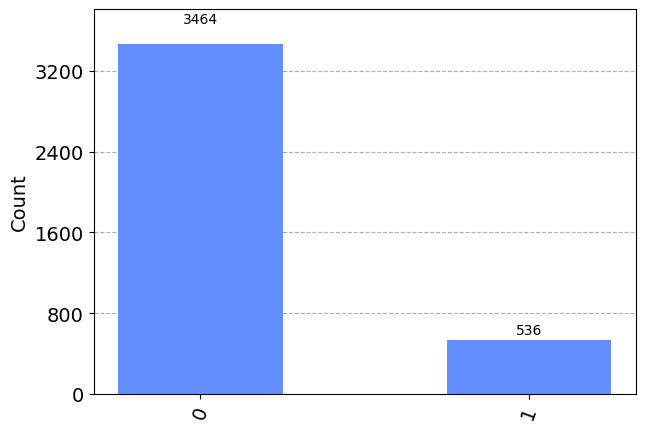

In [13]:
statistics = v.sample_counts(shots=4000)
plot_histogram(statistics)